In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Retrieve HTML table data
url = 'https://www.basketball-reference.com/leagues/NBA_2021_per_game.html'
html = pd.read_html(url, header = 0)
df2019 = html[0]

# Data cleaning
raw = df2019.drop(df2019[df2019.Age == 'Age'].index)
raw

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0
727,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
728,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
729,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4



### Acronym	Description

    Rk	Rank
    Pos	Position
    Age	Player's age on February 1 of the season
    Tm	Team
    G	Games
    GS	Games Started
    MP	Minutes Played Per Game
    FG	Field Goals Per Game
    FGA	Field Goal Attempts Per Game
    FG%	Field Goal Percentage
    3P	3-Point Field Goals Per Game
    3PA	3-Point Field Goal Attempts Per Game
    3P%	FG% on 3-Pt FGAs.
    2P	2-Point Field Goals Per Game
    2PA	2-Point Field Goal Attempts Per Game
    2P%	FG% on 2-Pt FGAs.
    eFG%	Effective Field Goal Percentage
    
    (Note: This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.)
    
    FT	Free Throws Per Game
    FTA	Free Throw Attempts Per Game
    FT%	Free Throw Percentage
    ORB	Offensive Rebounds Per Game
    DRB	Defensive Rebounds Per Game
    TRB	Total Rebounds Per Game
    AST	Assists Per Game
    STL	Steals Per Game
    BLK	Blocks Per Game
    TOV	Turnovers Per Game
    PF	Personal Fouls Per Game
    PTS	Points Per Game 
    

## Check the dataset shapes. 

In [2]:
raw.shape

(705, 30)

In [3]:
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        2
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%        6
eFG%       2
FT         0
FTA        0
FT%       29
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

### Fill missing values with 0

In [4]:
df = raw.fillna(0)

In [5]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

### Let's drop col that's not providing us any information. E.g Rk

In [6]:
df.drop(['Rk'], axis =1)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,.544,...,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,...,0,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,...,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,.570,...,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,.473,...,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,.462,...,.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0
727,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,.559,...,.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
728,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,.438,...,.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
729,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,.559,...,.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


### Let's write the data to CSV Files

In [7]:
df.to_csv('nba2021.csv', index = False)

In [8]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 8203-8CAF

 Directory of D:\Data Science\Python\All_JupyterNotebooks

27/03/2022  10:16 PM    <DIR>          .
17/03/2022  09:24 AM    <DIR>          ..
26/03/2022  04:32 PM    <DIR>          .ipynb_checkpoints
17/03/2022  10:07 AM            31,595 covid_data.csv
18/03/2022  12:06 AM         4,113,827 COVID-19 Explanatory Data Analysis and Visualizations .ipynb
16/03/2022  09:54 AM            27,314 Health Insurance .ipynb
16/03/2022  09:38 AM    <DIR>          health-insurance-cross-sell-prediction
27/03/2022  10:16 PM         2,777,066 NBA 2021 Exploratory Data Analysis.ipynb
25/03/2022  11:03 AM            93,468 nba2019.csv
27/03/2022  10:17 PM            93,468 nba2021.csv
26/03/2022  04:40 PM             1,791 Streamlit .ipynb
17/03/2022  11:40 AM           149,238 Untitled.ipynb
15/03/2022  11:46 AM           373,549 US- NATION-WIDE CAR ACCIDENT EDA REPORT .ipynb
16/03/2022  09:00 AM    <DIR>          us-accidents
15/03/

In [9]:
### Read and convert it back to DataFrame

In [10]:
df = pd.read_csv('nba2021.csv')

### Show all the datapoint in the dataset instead of the heads

In [11]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [12]:
df.drop(['Rk'], axis = 1, inplace = True)


In [13]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,...,0.000,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,0.473,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
5,LaMarcus Aldridge,C,35,SAS,21,18,25.9,5.5,11.8,0.464,...,0.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7
6,LaMarcus Aldridge,C,35,BRK,5,5,26.0,5.0,9.6,0.521,...,1.000,0.4,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8
7,Ty-Shon Alexander,SG,22,PHO,15,0,3.1,0.2,0.8,0.250,...,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
8,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10.0,0.419,...,0.727,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0
9,Grayson Allen,SG,25,MEM,50,38,25.2,3.5,8.3,0.418,...,0.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6


### Over view of data types of each columns in the DataFrame 

In [14]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

### Show Specific data types in our DataFrame

In [15]:
df.select_dtypes(include = ["number"])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,21,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,24,7,0,2.6,0.1,1.1,0.125,0.0,0.3,0.000,...,0.000,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,27,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,23,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,35,26,23,25.9,5.4,11.4,0.473,1.2,3.1,0.388,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
5,35,21,18,25.9,5.5,11.8,0.464,1.3,3.6,0.360,...,0.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7
6,35,5,5,26.0,5.0,9.6,0.521,0.8,1.0,0.800,...,1.000,0.4,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8
7,22,15,0,3.1,0.2,0.8,0.250,0.1,0.6,0.222,...,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
8,22,46,13,21.9,4.2,10.0,0.419,1.7,4.8,0.347,...,0.727,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0
9,25,50,38,25.2,3.5,8.3,0.418,2.1,5.5,0.391,...,0.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6


In [16]:
df.select_dtypes(include = ["object"])

,Player,Pos,Tm
0,Precious Achiuwa,PF,MIA
1,Jaylen Adams,PG,MIL
2,Steven Adams,C,NOP
3,Bam Adebayo,C,MIA
4,LaMarcus Aldridge,C,TOT
5,LaMarcus Aldridge,C,SAS
6,LaMarcus Aldridge,C,BRK
7,Ty-Shon Alexander,SG,PHO
8,Nickeil Alexander-Walker,SG,NOP
9,Grayson Allen,SG,MEM


### Conditional Selections

### Which player scored the most points(PTS) Per Game?

In [17]:
df[df.PTS == df.PTS.max()] # **This will return the entire raw**

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
151,Stephen Curry,PG,32,GSW,63,63,34.2,10.4,21.7,0.482,...,0.916,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0


In [18]:
TopScorer = df[df.PTS == df.PTS.max()]
TopScorer.Player

151    Stephen Curry
Name: Player, dtype: object

### What is the highest point scored?


In [19]:
df.PTS.max()

32.0

### Which Team does this player plays for ?

In [20]:
TopScorer.Tm

151    GSW
Name: Tm, dtype: object

### Which posiiton does this player play?

In [21]:
TopScorer.Pos

151    PG
Name: Pos, dtype: object

### How many games did the player play in 2021 season?

In [22]:
TopScorer.G

151    63
Name: G, dtype: int64

### Which players scored more than 20 Point(PTS) Per Game?

In [23]:
df[df.PTS > 20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
17,Giannis Antetokounmpo,PF,26,MIL,61,61,33.0,10.3,18.0,0.569,...,0.685,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1
45,Bradley Beal,SG,27,WAS,60,60,35.8,11.2,23.0,0.485,...,0.889,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3
71,Devin Booker,SG,24,PHO,67,67,33.9,9.3,19.2,0.484,...,0.867,0.5,3.7,4.2,4.3,0.8,0.2,3.1,2.7,25.6
89,Malcolm Brogdon,PG,28,IND,56,56,34.5,7.9,17.5,0.453,...,0.864,1.0,4.2,5.3,5.9,0.9,0.3,2.1,2.0,21.2
94,Jaylen Brown,SG,24,BOS,58,58,34.5,9.3,19.2,0.484,...,0.764,1.2,4.8,6.0,3.4,1.2,0.6,2.7,2.9,24.7
106,Jimmy Butler,SF,31,MIA,52,52,33.6,7.0,14.2,0.497,...,0.863,1.8,5.1,6.9,7.1,2.1,0.3,2.1,1.4,21.5
151,Stephen Curry,PG,32,GSW,63,63,34.2,10.4,21.7,0.482,...,0.916,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0
153,Anthony Davis,PF,27,LAL,36,36,32.3,8.4,17.0,0.491,...,0.738,1.7,6.2,7.9,3.1,1.3,1.6,2.1,1.7,21.8
161,DeMar DeRozan,PF,31,SAS,61,61,33.7,7.5,15.1,0.495,...,0.880,0.7,3.6,4.2,6.9,0.9,0.2,2.0,2.1,21.6
171,Luka Dončić,PG,21,DAL,66,66,34.3,9.8,20.5,0.479,...,0.730,0.8,7.2,8.0,8.6,1.0,0.5,4.3,2.3,27.7


### Which player had the highest 3-Point Field Goals Per Game(3P)? 

In [24]:
Highest3P = df[df['3P'] == df['3P'].max()]
Highest3P

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
151,Stephen Curry,PG,32,GSW,63,63,34.2,10.4,21.7,0.482,...,0.916,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0


In [25]:
Highest3P["3P"]

151    5.3
Name: 3P, dtype: float64

### Which Player has the highest assist Per Game(AST)?

In [26]:
HighestAssist = df[df["AST"] == df['AST'].max()]
HighestAssist

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
675,Russell Westbrook,PG,32,WAS,65,65,36.4,8.4,19.0,0.439,...,0.656,1.7,9.9,11.5,11.7,1.4,0.4,4.8,2.9,22.2


In [27]:
HighestAssist["AST"]

675    11.7
Name: AST, dtype: float64

### As a Lakers Fan myself, let's get some information about the teams performance

### Use GroupBy functions for aggregations

#### Which player scored the highest(PTS) in the Los Angeles Lakers? Let's get everyone who plays for LA first

In [28]:
LAL= df.groupby('Tm').get_group('LAL')
LAL

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
18,Kostas Antetokounmpo,PF,23,LAL,15,0,3.7,0.2,0.7,0.300,...,0.462,0.3,1.0,1.3,0.1,0.1,0.3,0.7,0.5,0.8
108,Devontae Cacok,PF,24,LAL,20,1,4.9,0.9,1.5,0.586,...,0.455,0.6,1.0,1.6,0.1,0.3,0.2,0.3,0.4,2.0
109,Kentavious Caldwell-Pope,SG,27,LAL,67,67,28.4,3.3,7.6,0.431,...,0.866,0.4,2.3,2.7,1.9,0.9,0.4,1.0,1.7,9.7
120,Alex Caruso,PG,26,LAL,58,6,21.0,2.3,5.3,0.436,...,0.645,0.5,2.4,2.9,2.8,1.1,0.3,1.3,1.9,6.4
136,Quinn Cook,PG,27,LAL,16,0,3.9,0.8,1.6,0.462,...,0.800,0.0,0.3,0.3,0.3,0.1,0.1,0.2,0.1,2.1
153,Anthony Davis,PF,27,LAL,36,36,32.3,8.4,17.0,0.491,...,0.738,1.7,6.2,7.9,3.1,1.3,1.6,2.1,1.7,21.8
180,Andre Drummond,C,27,LAL,21,21,24.8,4.9,9.1,0.531,...,0.605,3.1,7.1,10.2,1.4,1.1,1.0,2.0,3.8,11.9
181,Jared Dudley,PF,35,LAL,12,0,6.8,0.2,0.8,0.222,...,0.000,0.3,1.4,1.8,0.4,0.1,0.1,0.2,0.6,0.5
221,Marc Gasol,C,36,LAL,52,42,19.1,1.7,3.7,0.454,...,0.720,0.7,3.4,4.1,2.1,0.5,1.1,1.0,2.2,5.0
265,Montrezl Harrell,C,27,LAL,69,1,22.9,5.4,8.7,0.622,...,0.707,2.3,3.9,6.2,1.1,0.7,0.7,1.1,1.9,13.5


In [29]:
LAL[LAL.PTS == LAL.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
329,LeBron James,PG,36,LAL,45,45,33.4,9.4,18.3,0.513,...,0.698,0.6,7.0,7.7,7.8,1.1,0.6,3.7,1.6,25.0


**King James still killing it at the age of 36**

### Of the 5 positons, which position has the highest points?  First we need to group the team by position

In [30]:
df.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,138.0,8.451449,5.648205,0.0,4.775,7.55,11.200,28.5
C-PF,2.0,8.450000,7.141778,3.4,5.925,8.45,10.975,13.5
PF,143.0,7.484615,5.924184,0.0,3.150,6.00,10.050,28.1
PF-C,1.0,7.000000,NaN,7.0,7.000,7.00,7.000,7.0
PF-SF,1.0,5.200000,NaN,5.2,5.200,5.20,5.200,5.2
PG,127.0,9.625984,7.062737,0.0,4.450,7.50,13.250,32.0
PG-SG,1.0,24.600000,NaN,24.6,24.600,24.60,24.600,24.6
SF,119.0,7.811765,6.013081,0.0,3.900,6.10,10.900,26.4
SF-PF,4.0,4.800000,3.549648,1.5,2.700,4.00,6.100,9.7


### Let's focus ONLY on the 5 main positions within the game.i.e: [C, PF, PG, SF, SG]

In [31]:
positions = ['C','PF', 'SF', 'PG', 'SG']
POS = df[df["Pos"].isin(positions)]

In [32]:
POS

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,...,0.000,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,0.473,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
5,LaMarcus Aldridge,C,35,SAS,21,18,25.9,5.5,11.8,0.464,...,0.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7
6,LaMarcus Aldridge,C,35,BRK,5,5,26.0,5.0,9.6,0.521,...,1.000,0.4,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8
7,Ty-Shon Alexander,SG,22,PHO,15,0,3.1,0.2,0.8,0.250,...,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
8,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10.0,0.419,...,0.727,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0
9,Grayson Allen,SG,25,MEM,50,38,25.2,3.5,8.3,0.418,...,0.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6


### Check the Statistical Analysis of the positions 

In [33]:
POS.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,25.882438,37.162554,16.873730,19.405080,3.161974,6.939623,0.441646,0.957039,2.706096,0.298329,...,0.720582,0.807112,2.769811,3.576052,1.927141,0.609144,0.415385,1.071118,1.622932,8.599855
std,4.114191,21.353877,21.626588,9.172654,2.284205,4.728152,0.115204,0.876244,2.225191,0.143486,...,0.208871,0.735416,1.822634,2.396453,1.795109,0.392799,0.410114,0.810931,0.762700,6.272961
min,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,18.000000,0.000000,12.500000,1.400000,3.500000,0.395000,0.200000,0.900000,0.250000,...,0.667000,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.500000,1.100000,4.000000
50%,25.000000,37.000000,5.000000,19.200000,2.600000,5.900000,0.439000,0.700000,2.200000,0.333000,...,0.769000,0.600000,2.500000,3.100000,1.400000,0.600000,0.300000,0.900000,1.600000,7.200000
75%,28.000000,57.000000,29.000000,26.900000,4.300000,9.300000,0.496000,1.500000,4.100000,0.386000,...,0.843000,1.000000,3.700000,4.800000,2.500000,0.900000,0.600000,1.400000,2.100000,11.700000
max,40.000000,72.000000,72.000000,37.600000,11.200000,23.000000,1.000000,5.300000,12.700000,1.000000,...,1.000000,4.700000,10.100000,14.300000,11.700000,2.100000,3.400000,5.000000,4.000000,32.000000


In [34]:
POS.groupby("Pos").PTS.describe()


,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,138.0,8.451449,5.648205,0.0,4.775,7.55,11.200,28.5
PF,143.0,7.484615,5.924184,0.0,3.150,6.00,10.050,28.1
PG,127.0,9.625984,7.062737,0.0,4.450,7.50,13.250,32.0
SF,119.0,7.811765,6.013081,0.0,3.900,6.10,10.900,26.4
SG,162.0,9.485185,6.427515,0.1,4.400,8.25,12.425,31.3


### Data Visualisations

**Create a subset of the dataset for position and points**

In [35]:
PTS = df[['Pos', 'PTS']]
positions = ['C','PF', 'SF', 'PG', 'SG']
PTS = PTS[PTS['Pos'].isin(positions)]

In [36]:
PTS

,Pos,PTS
0,PF,5.0
1,PG,0.3
2,C,7.6
3,C,18.7
4,C,13.5
5,C,13.7
6,C,12.8
7,SG,0.6
8,SG,11.0
9,SG,10.6


array([[<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'PF'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'SF'}>],
       [<AxesSubplot:title={'center':'SG'}>, <AxesSubplot:>]],
      dtype=object)

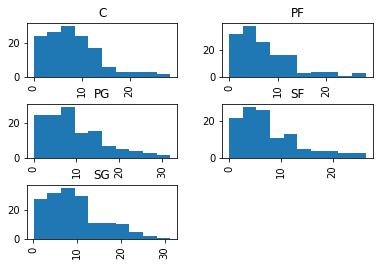

In [37]:
PTS['PTS'].hist(by = PTS['Pos'])

array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>,
       <AxesSubplot:title={'center':'PG'}>,
       <AxesSubplot:title={'center':'SF'}>,
       <AxesSubplot:title={'center':'SG'}>], dtype=object)

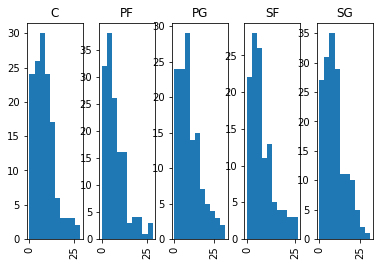

In [38]:
PTS['PTS'].hist(by = PTS['Pos'], layout = (1,5))

array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>,
       <AxesSubplot:title={'center':'PG'}>,
       <AxesSubplot:title={'center':'SF'}>,
       <AxesSubplot:title={'center':'SG'}>], dtype=object)

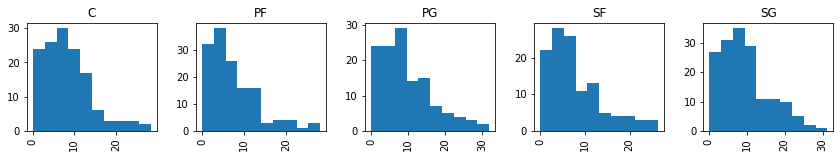

In [39]:
PTS['PTS'].hist(by = PTS['Pos'], layout = (1,5), figsize = (14, 2))

In [40]:
# Let's use Seaborn for visualisations

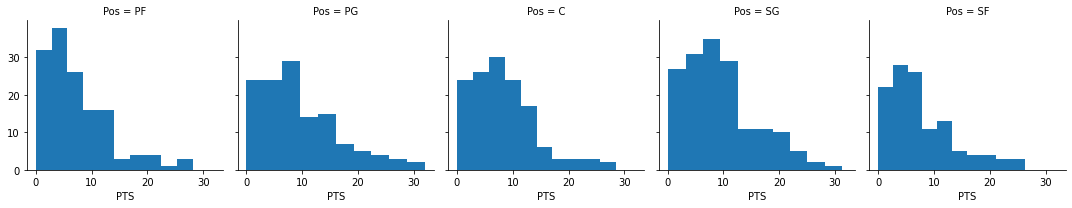

In [41]:
g = sns.FacetGrid(PTS, col = "Pos")
g.map(plt.hist, 'PTS')

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

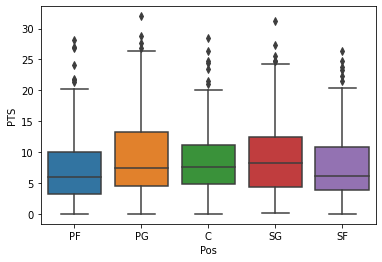

In [42]:
sns.boxplot(x = 'Pos', y = "PTS", data = PTS)

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

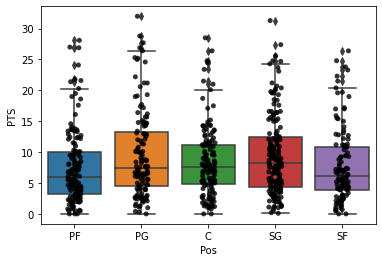

In [43]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

Text(0.5, 1.0, 'Average Points Per Position')

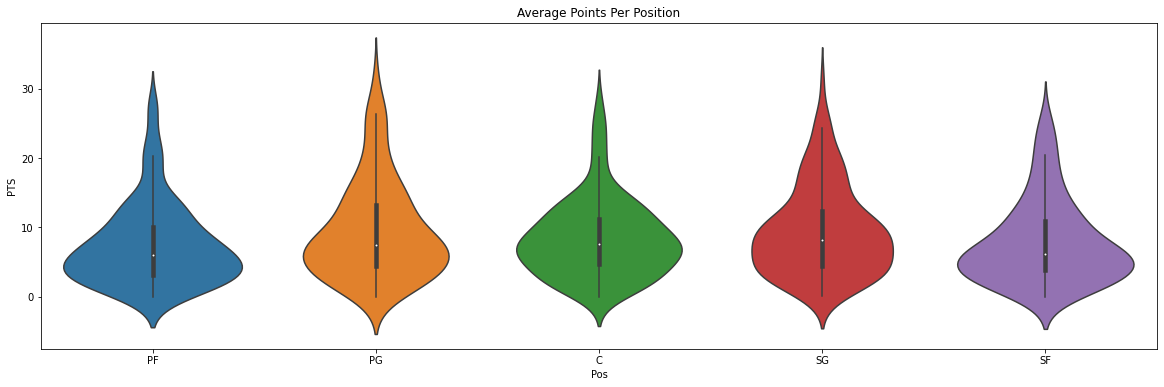

In [44]:
plt.figure(figsize = (20,6))
sns.violinplot(x = "Pos", y  = 'PTS', data = PTS).set_title("Average Points Per Position")

## Compute the correlation matrix

In [45]:
corr = df.corr()
corr

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.061119,0.092335,0.198153,0.127956,0.132420,0.048242,0.185962,0.163591,0.113262,...,0.129573,0.017896,0.139539,0.111839,0.226687,0.178456,0.042726,0.121069,0.111609,0.138877
G,0.061119,1.000000,0.644453,0.553135,0.472687,0.441459,0.296131,0.397096,0.362864,0.297257,...,0.322548,0.264688,0.404790,0.389992,0.337747,0.409568,0.181272,0.325467,0.392205,0.465707
GS,0.092335,0.644453,1.000000,0.764826,0.716464,0.692610,0.221514,0.511321,0.499250,0.187241,...,0.209549,0.370520,0.629791,0.593427,0.550817,0.553341,0.322566,0.591306,0.536160,0.713721
MP,0.198153,0.553135,0.764826,1.000000,0.879032,0.888528,0.256452,0.693692,0.707618,0.326397,...,0.373425,0.381314,0.730310,0.672641,0.712777,0.753880,0.358051,0.736907,0.705754,0.879928
FG,0.127956,0.472687,0.716464,0.879032,1.000000,0.975263,0.325081,0.669591,0.669400,0.287325,...,0.321964,0.381583,0.724941,0.668630,0.720105,0.652066,0.340571,0.794838,0.595233,0.990473
FGA,0.132420,0.441459,0.692610,0.888528,0.975263,1.000000,0.176683,0.752209,0.771808,0.318068,...,0.340317,0.260060,0.664572,0.585309,0.749028,0.669474,0.248033,0.802002,0.563711,0.980010
FG%,0.048242,0.296131,0.221514,0.256452,0.325081,0.176683,1.000000,-0.020309,-0.082341,0.110932,...,0.194170,0.473793,0.358801,0.418678,0.088282,0.177922,0.409630,0.144745,0.337232,0.278695
3P,0.185962,0.397096,0.511321,0.693692,0.669591,0.752209,-0.020309,1.000000,0.980135,0.524588,...,0.368599,-0.148875,0.323751,0.200154,0.537287,0.486753,-0.034478,0.496285,0.322891,0.722054
3PA,0.163591,0.362864,0.499250,0.707618,0.669400,0.771808,-0.082341,0.980135,1.000000,0.465541,...,0.350303,-0.156481,0.325056,0.198842,0.557703,0.504022,-0.041055,0.523658,0.339857,0.722231
3P%,0.113262,0.297257,0.187241,0.326397,0.287325,0.318068,0.110932,0.524588,0.465541,1.000000,...,0.383266,-0.224666,0.089386,-0.000108,0.262648,0.242138,-0.139143,0.176498,0.133237,0.316505


## Generate Intercorrelation Heat map

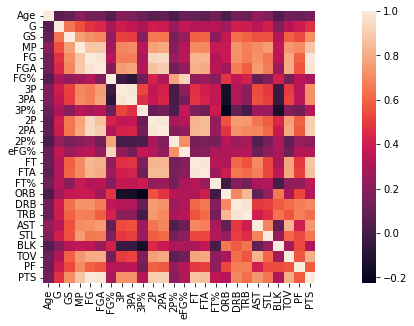

In [46]:

fig, ax = plt.subplots(figsize = (17, 5))
sns.heatmap(corr, square = True);


## Mask diagonal half of heat map (Diagonal correlation matrix)

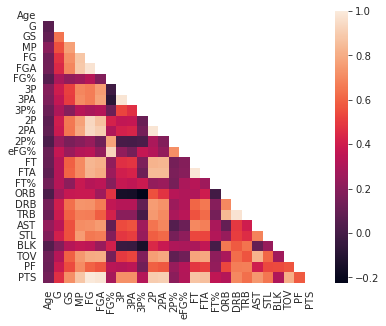

In [47]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

In [48]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,...,0.000,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,0.473,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5


In [49]:
df.select_dtypes(include = ['number']).head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,21,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,24,7,0,2.6,0.1,1.1,0.125,0.0,0.3,0.000,...,0.000,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,27,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,23,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,35,26,23,25.9,5.4,11.4,0.473,1.2,3.1,0.388,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5


### Select the first 5 columns (by index number)

In [50]:
number = df.select_dtypes(include = ['number'])
number.iloc[:,:5].head()

,Age,G,GS,MP,FG
0,21,61,4,12.1,2.0
1,24,7,0,2.6,0.1
2,27,58,58,27.7,3.3
3,23,64,64,33.5,7.1
4,35,26,23,25.9,5.4


### Select 5 specific columns(by col names)

In [51]:
selections= ['Age', 'G', 'STL', 'BLK', 'AST', 'PTS']
df5 = df[selections]
df5.head()



,Age,G,STL,BLK,AST,PTS
0,21,61,0.3,0.5,0.5,5.0
1,24,7,0.0,0.0,0.3,0.3
2,27,58,0.9,0.7,1.9,7.6
3,23,64,1.2,1.0,5.4,18.7
4,35,26,0.4,1.1,1.9,13.5


## Make scatter plot grid for the above cols

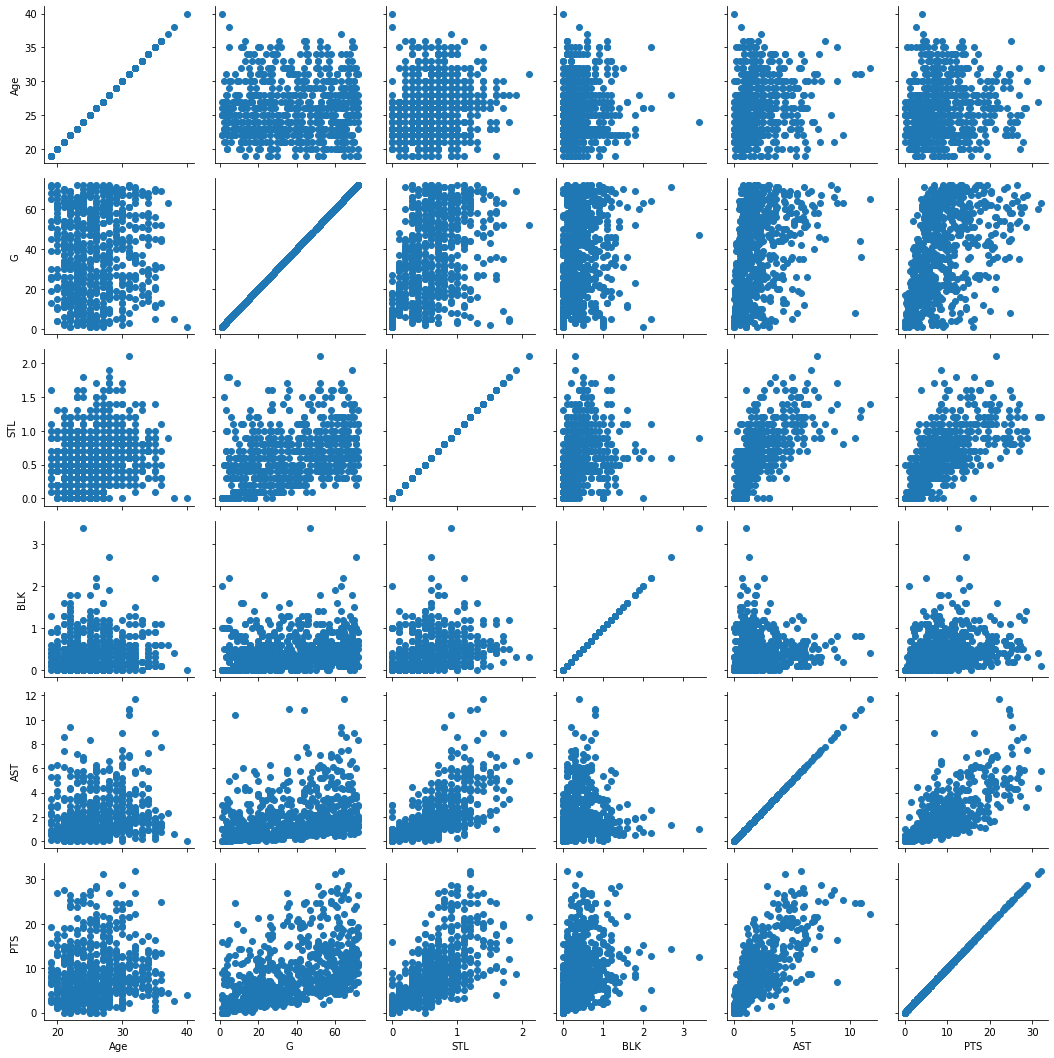

In [52]:
Scatplot = sns.PairGrid(df5)
Scatplot.map(plt.scatter);

## Generate the summary of the entire Dataset

In [53]:
from pandas_profiling import ProfileReport

In [54]:
profile = ProfileReport(df, title="NBA2021")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]